# Importing Libraries & Data

In [ ]:
#Important functions gathered

#TO ADD
#REMOVE REFEREES WITH LESS THAN 22 DYADS
rawData.sort_values('refNum');
allRefs = len(rawData.refNum.value_counts())
allDyads = np.sum(rawData.games)

specRef=rawData
for i in range(allRefs):
    specRef1=specRef[specRef['refNum']==i] #we put dataframe of each referee into specRef1 as a temporary variable
    if(np.sum(specRef1['games'])<22):
        specRef=specRef.drop(specRef1.index)
        
specRef.head()  #specRef is now containing the new DataFrame without the referees with less than 22 Dyads, corresponding to one game as a referee.
specRef=specRef.reset_index(drop=True)  #To reset the index of the Dataframe


#TO ADD
#MANAGE NULL VALUES
isNullValue=rawData.isnull().sum()
isNullValue


#TO ADD
#MANAGE NULL VALUES II
specRef['position']=specRef['position'].replace(np.nan,'undefined', regex=True)
specRef=specRef.dropna(axis=0, how='any',subset=['rater1','SkinColor','height','weight','meanIAT'])
isNullValue=specRef.isnull().sum()
isNullValue


#TO ADD
#PLOT OF THE RATER
fig, ax = plt.subplots(1,4,figsize=(12, 4))
c = sns.color_palette()
ax[0].hist(specRef['rater1'].dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[0].set_title('Rater 1')
ax[1].hist(specRef['rater2'].dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[1].set_title('Rater 2')
ax[2].hist(((specRef['rater1']+specRef['rater2'])/2).dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[2].set_title('Rater Mean')
ax[3].hist((specRef['rater1']-specRef['rater2']).dropna().tolist(),bins = 5, range = (-0.5,0.5), color = c[0])
ax[3].set_title('Difference')

fig.tight_layout()



#TO ADD
#ADD COLUMN WITH AVERAGE RATER
specRef=specRef.assign(MeanRater=(specRef['rater1']+specRef['rater2'])/2)
specRef.head()



#TO ADD
#CREATE A DATAFRAME TO HAVE ONE ENTRY PER PLAYER
b=0
PlayerSet=specRef;
PlayerSet=PlayerSet.assign(NumberGames=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(average_cards_per_game=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(personal_implicit_bias=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(personal_explicit_bias=[np.nan for i in range(len(PlayerSet))])
myDataFrames = []

for i in ['aaron-hughes','aleksandar-kolarov','alexander-tettey','anders-lindegaard']:   #PlayerSet['playerShort'].unique():
    #Local Variable PlayerSetVariable to stock part of PlayerSet DataFrame
    PlayerSetIntermed=PlayerSet[PlayerSet['playerShort']==i]
    #Features to replace in the DataFrame
    PlayerSetIntermed['NumberGames']=len(PlayerSetIntermed)  
    PlayerSetIntermed['yellowCards']=PlayerSetIntermed['yellowCards'].values.sum()
    PlayerSetIntermed['yellowReds']=PlayerSetIntermed['yellowReds'].values.sum()
    PlayerSetIntermed['redCards']=PlayerSetIntermed['redCards'].values.sum()
    PlayerSetIntermed['games']=PlayerSetIntermed['games'].values.sum()
    PlayerSetIntermed['victories']=PlayerSetIntermed['victories'].values.sum()
    PlayerSetIntermed['ties']=PlayerSetIntermed['ties'].values.sum()
    PlayerSetIntermed['defeats']=PlayerSetIntermed['defeats'].values.sum()
    PlayerSetIntermed['goals']=PlayerSetIntermed['goals'].values.sum() 
    #Add at the last line the first line of the sub-DataFrame into myDataFrame
    myDataFrames.append(PlayerSetIntermed.iloc[[0]])
    #We delete all the rows from the player i in PlayerSet
    #PlayerSet=PlayerSet.drop(PlayerSetIntermed.index) NO NEED OF THAT
    b=b+1
    PlayerSetIntermed=[]
    
    
    #JIAXI PART
    # Create new features. change 'ah' to your iterator name(like 'i', or 'player')
    PlayerSetIntermed['average_cards_per_game'] = (PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games']

    #higher IAT = higher Exp = 
    PlayerSetIntermed['personal_implicit_bias'] = ((PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games'] - average_cards_per_game) * PlayerSetIntermed['meanIAT']
    PlayerSetIntermed['personal_explicit_bias'] = ((PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games'] - average_cards_per_game) * PlayerSetIntermed['meanExp']

    average_implicit_bias = PlayerSetIntermed['personal_implicit_bias'].sum() / PlayerSetIntermed.shape[0]
    average_explicit_bias = PlayerSetIntermed['personal_explicit_bias'].sum() / PlayerSetIntermed.shape[0]
    
#Concatenate all the rows
finalDataFrame = pd.concat(myDataFrames, axis=1)
finalDataFrame




#TO ADD AFTER THE DATAFRAME PER PLAYER IS DONE
#ATTRIBUTE THE CLASS BLACK OR WHITE TO EACH PLAYER
specRef=specRef.assign(SkinColor=np.random.randn(len(specRef)))

for i in range(len(specRef)):
    if (specRef.iloc[i,28]<0.5):
        specRef.iloc[i,29]='white'
    elif(specRef.iloc[i,28]>0.5):
        specRef.iloc[i,29]='black'
    else:
        specRef.iloc[i,29]=np.nan
        
specRef.head()
specRef['SkinColor'].value_counts()


#TO ADD
#CALCULATE AGE OF PLAYERS
a=[]
b=0
for i in NewDataSet['birthday'].values:
    a=i[6:] #to select the year
    (NewDataSet['Age'])[b]=2016-int(a)
    b=b+1

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats.mstats as ssm
from scipy.stats import gaussian_kde as kde
import random
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [2]:
rawData=pd.read_csv('CrowdstormingDataJuly1st.csv')

# Visualizing rawData

In [3]:
rawData.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


The definition of all the "column values" are described in DATA.md but let screen them here also: 

In [4]:
rawData.ix[:10,13:]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


# Analyzing Data

After looking at the data, we realized that some referees had less than 22 Dayds which is technically impossible since at every game each referee receive at least 22 Dyads. So we decied to remove the referees with less than 22 Dyads

In [ ]:
#TO ADD
#REMOVE REFEREES WITH LESS THAN 22 DYADS
rawData.sort_values('refNum');
allRefs = len(rawData.refNum.value_counts())
allDyads = np.sum(rawData.games)

specRef=rawData
for i in range(allRefs):
    specRef1=specRef[specRef['refNum']==i] #we put dataframe of each referee into specRef1 as a temporary variable
    if(np.sum(specRef1['games'])<22):
        specRef=specRef.drop(specRef1.index)
        
specRef.head()  #specRef is now containing the new DataFrame without the referees with less than 22 Dyads, corresponding to one game as a referee.
specRef=specRef.reset_index(drop=True)  #To reset the index of the Dataframe




Now let's study the two parameters 'rater1' and 'rater2' to see their robustness to define if a player is "black" or "white". And to do so, lets visualize the two raters first.

In [8]:
#TO ADD
#PLOT OF THE RATER
fig, ax = plt.subplots(1,4,figsize=(12, 4))
c = sns.color_palette()
ax[0].hist(specRef['rater1'].dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[0].set_title('Rater 1')
ax[1].hist(specRef['rater2'].dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[1].set_title('Rater 2')
ax[2].hist(((specRef['rater1']+specRef['rater2'])/2).dropna().tolist(),bins = 5, range = (0,1), color = c[0])
ax[2].set_title('Rater Mean')
ax[3].hist((specRef['rater1']-specRef['rater2']).dropna().tolist(),bins = 5, range = (-0.5,0.5), color = c[0])
ax[3].set_title('Difference')

fig.tight_layout()

/Users/cyrilschmitt/anaconda/lib/python3.5/site-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


We can see that the diffeence between the two parameters, is in general low. We can then conclude that this parameters can be used to define if a person is white or black.

Preparation Train/Test Dataframe

Machine Learning: Output skin color with a certain matrix!

In [76]:
#TO ADD
#ADD COLUMN WITH AVERAGE RATER
specRef=specRef.assign(MeanRater=(specRef['rater1']+specRef['rater2'])/2)
specRef.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,MeanRater
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000


One line per player

Give label to each row of the train dataset

In [ ]:
#TO ADD AFTER THE DATAFRAME PER PLAYER IS DONE
#ATTRIBUTE THE CLASS BLACK OR WHITE TO EACH PLAYER
specRef=specRef.assign(SkinColor=np.random.randn(len(specRef)))

for i in range(len(specRef)):
    if (specRef.iloc[i,28]<0.5):
        specRef.iloc[i,29]='white'
    elif(specRef.iloc[i,28]>0.5):
        specRef.iloc[i,29]='black'
    else:
        specRef.iloc[i,29]=np.nan
        
specRef.head()
specRef['SkinColor'].value_counts()

Managing NaN Datas

In [11]:
#TO ADD
#MANAGE NULL VALUES
isNullValue=rawData.isnull().sum()
isNullValue

playerShort          0
player               0
club                 0
leagueCountry        0
birthday             0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowCards          0
yellowReds           0
redCards             0
photoID          21407
rater1           21407
rater2           21407
refNum               0
refCountry           0
Alpha_3              1
meanIAT            163
nIAT               163
seIAT              163
meanExp            163
nExp               163
seExp              163
dtype: int64

In [12]:
specRef['position']=specRef['position'].replace(np.nan,'undefined', regex=True)
specRef=specRef.dropna(axis=0, how='any',subset=['rater1','SkinColor','height','weight','meanIAT'])
isNullValue=specRef.isnull().sum()
isNullValue

playerShort      0
player           0
club             0
leagueCountry    0
birthday         0
height           0
weight           0
position         0
games            0
victories        0
ties             0
defeats          0
goals            0
yellowCards      0
yellowReds       0
redCards         0
photoID          0
rater1           0
rater2           0
refNum           0
refCountry       0
Alpha_3          0
meanIAT          0
nIAT             0
seIAT            0
meanExp          0
nExp             0
seExp            0
Mean             0
dtype: int64

In [74]:
b=0
PlayerSet=specRef;
PlayerSet=PlayerSet.assign(NumberGames=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(average_cards_per_game=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(personal_implicit_bias=[np.nan for i in range(len(PlayerSet))])
PlayerSet=PlayerSet.assign(personal_explicit_bias=[np.nan for i in range(len(PlayerSet))])
myDataFrames = []

for i in ['aaron-hughes','aleksandar-kolarov','alexander-tettey','anders-lindegaard']:   #PlayerSet['playerShort'].unique():
    #Local Variable PlayerSetVariable to stock part of PlayerSet DataFrame
    PlayerSetIntermed=PlayerSet[PlayerSet['playerShort']==i]
    #Features to replace in the DataFrame
    PlayerSetIntermed['NumberGames']=len(PlayerSetIntermed)  
    PlayerSetIntermed['yellowCards']=PlayerSetIntermed['yellowCards'].values.sum()
    PlayerSetIntermed['yellowReds']=PlayerSetIntermed['yellowReds'].values.sum()
    PlayerSetIntermed['redCards']=PlayerSetIntermed['redCards'].values.sum()
    PlayerSetIntermed['games']=PlayerSetIntermed['games'].values.sum()
    PlayerSetIntermed['victories']=PlayerSetIntermed['victories'].values.sum()
    PlayerSetIntermed['ties']=PlayerSetIntermed['ties'].values.sum()
    PlayerSetIntermed['defeats']=PlayerSetIntermed['defeats'].values.sum()
    PlayerSetIntermed['goals']=PlayerSetIntermed['goals'].values.sum() 
    #Add at the last line the first line of the sub-DataFrame into myDataFrame
    myDataFrames.append(PlayerSetIntermed.iloc[[0]])
    #We delete all the rows from the player i in PlayerSet
    #PlayerSet=PlayerSet.drop(PlayerSetIntermed.index) NO NEED OF THAT
    b=b+1
    PlayerSetIntermed=[]
    
    
    #JIAXI PART
    # Create new features. change 'ah' to your iterator name(like 'i', or 'player')
    PlayerSetIntermed['average_cards_per_game'] = (PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games']

    #higher IAT = higher Exp = 
    PlayerSetIntermed['personal_implicit_bias'] = ((PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games'] - average_cards_per_game) * PlayerSetIntermed['meanIAT']
    PlayerSetIntermed['personal_explicit_bias'] = ((PlayerSetIntermed['yellowCards'] + PlayerSetIntermed['yellowReds'] + PlayerSetIntermed['redCards']) / PlayerSetIntermed['games'] - average_cards_per_game) * PlayerSetIntermed['meanExp']

    average_implicit_bias = PlayerSetIntermed['personal_implicit_bias'].sum() / PlayerSetIntermed.shape[0]
    average_explicit_bias = PlayerSetIntermed['personal_explicit_bias'].sum() / PlayerSetIntermed.shape[0]

    
#Concatenate all the rows
finalDataFrame = pd.concat(myDataFrames, axis=1)
finalDataFrame
#specRef=rawData
#for i in range(allRefs):
#    specRef1=specRef[specRef['refNum']==i] #we put dataframe of each referee into specRef1 as a temporary variable
#    if(np.sum(specRef1['games'])<22):
#        specRef=specRef.drop(specRef1.index)

/Users/cyrilschmitt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cyrilschmitt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cyrilschmitt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

TypeError: list indices must be integers or slices, not str

In [64]:
finalDataFrame.ix[:3,:20]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum
0,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,650.0,246.0,179.0,225.0,9.0,19.0,0.0,0.0,3868.jpg,0.25,0.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
finalDataFrame.ix[:3,19:31]

,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,Mean,MeanRater,NumberGames
0,4.0,4.0,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0.125,162.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print('Initial Total Datas:', len(rawData))
print('Data Lost:',len(rawData)-len(specRef))
print('Remaining Data:', len(specRef))
print('Percent Data Lost:', (len(rawData)-len(specRef))/len(rawData)*100)

Initial Total Datas: 146028
Data Lost: 37540
Remaining Data: 108488
Percent Data Lost: 25.707398581094036


# ML data preparation

In [15]:
specRef[['meanIAT','nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']].describe()

,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,108488.000000,1.084880e+05,1.084880e+05,108488.000000,1.084880e+05,108488.000000
mean,0.348458,1.777510e+04,4.641198e-04,0.463537,1.843760e+04,0.002282
std,0.029287,1.214450e+05,2.332806e-03,0.203088,1.247780e+05,0.012231
min,-0.047254,7.000000e+00,2.235373e-07,-1.375000,8.000000e+00,0.000001
25%,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,0.573793,1.975803e+06,7.333041e-02,1.800000,2.029548e+06,0.329309


In order to select correctly the parameters that we will take into account, we need to ponderate the fracton of importance for each of IAT and Exp factors taking into account the Standard Error: seIAT and seExp. The higher the Standard Error is the Lower the impact on the data should be.

In [ ]:
InvErrIAT=abs(specRef['seIAT']-specRef['seIAT'].max())
InvErrExp=abs(specRef['seExp']-specRef['seExp'].max())

PropErrIAT=InvErrIAT/max(InvErrIAT)
PropErrExp=InvErrExp/max(InvErrExp)


In [55]:
#Calculate Age
NewDataSet=specRef.set_index(specRef['playerShort'],drop=True)
NewDataSet = NewDataSet.drop(['playerShort','player','club','leagueCountry'], 1)

In [56]:
NewDataSet=NewDataSet.assign(Age=[np.nan for i in range(len(NewDataSet))])

#Get the year the player were born
a=[]
b=0
for i in NewDataSet['birthday'].values:
    a=i[6:] #to select the year
    (NewDataSet['Age'])[b]=2016-int(a)
    b=b+1

/Users/cyrilschmitt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

# Test/Train

In [97]:
indexes = np.random.rand(len(newSpecRef)) < 0.8
train = newSpecRef[indexes]
test = newSpecRef[~indexes]
y=train['SkinColor']
ytest=test['SkinColor']

RandomForest

Encoding Categorical feature...

In [169]:
country=preprocessing.LabelEncoder()
country.fit(train['Alpha_3'])
list(country.classes_)
newValue=country.transform(train['Alpha_3'])
print(newValue)
X=train[['height', 'weight']]   #add or remove features
Xtest=test[['height','weight']]  #add or remove features

[56 56 56 ..., 44 44 44]


AttributeError: 'DataFrame' object has no attribute 'concat'

In [135]:
scoreIntermed=[]
score=[]
for i in range(1,4,1): #value of score decreace with value higher than 1
    for j in range(1,4,1):
        clf=RandomForestClassifier(max_depth=i, n_estimators=j, max_features=2)
        clf.fit(X, y)
        clf_probs = clf.predict_proba(Xtest)
        scoreIntermed.append(log_loss(ytest, clf_probs))
    score.append(scoreIntermed)
    scoreIntermed=[]
score

[[0.43499902298177129, 0.4360267178316608, 0.436027399261328],
 [0.43299364570858478, 0.43297174587018394, 0.43119596580844849],
 [0.42881629074503552, 0.42860231877493787, 0.42551025530964698]]

# Part 1 with K-NN, out of scope

Define features for classifying (I)

In [96]:
X=train[['height', 'weight']]   #add or remove features
Xtest=test[['height','weight']]   #add or remove features

K-NN Method (I) / BEST ONE

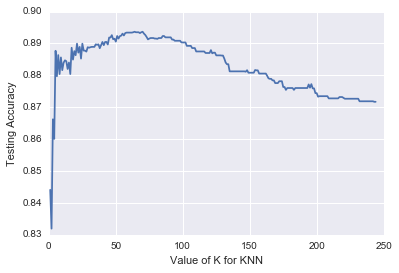

In [20]:
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    ypredict = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(ytest, ypredict))

%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')  

Max for value k=53 

In [21]:
knn = KNeighborsClassifier(n_neighbors=53)
knn.fit(X, y)
ypredict = knn.predict(Xtest)
print(metrics.accuracy_score(ytest, ypredict))

0.892295387897


Cross-validation on 20 Folds

In [23]:
scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
cross_validation=scores.mean()
print(cross_validation) 

0.886904653129


Define features for classifying (II)

In [33]:
X=train[['height', 'weight','yellowCards','yellowReds']]   #add or remove features
Xtest=test[['height','weight','yellowCards','yellowReds']]   #add or remove features

K-NN Method (II) / OVERFITTING

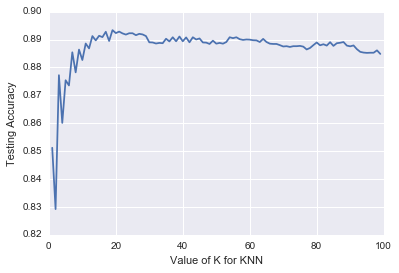

In [34]:
k_range = list(range(1, 40))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    ypredict = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(ytest, ypredict))

%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')  

Max for value k=19

In [35]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)
ypredict = knn.predict(Xtest)
print(metrics.accuracy_score(ytest, ypredict))

0.893361770195


Cross-validation on 20 folds

In [36]:
scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
cross_validation=scores.mean()
print(cross_validation) 

0.885989065633


Results are a little bit lower than with the only two parameters: "height" and "weight"

Define features for classifying (III)

In [38]:
X=train[['yellowCards','yellowReds']]   #add or remove features
Xtest=test[['yellowCards','yellowReds']]   #add or remove features

K-NN Method (III) / Bad Parameters

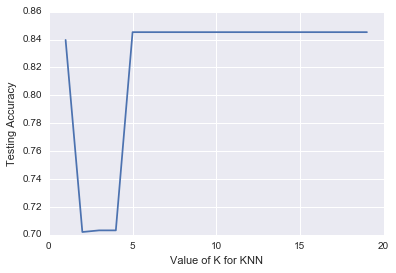

In [43]:
k_range = list(range(1, 10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    ypredict = knn.predict(Xtest)
    scores.append(metrics.accuracy_score(ytest, ypredict))

%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')  

Max for value k=5

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
ypredict = knn.predict(Xtest)
print(metrics.accuracy_score(ytest, ypredict))

0.845267928552


Cross-validation on 20 folds

In [45]:
scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
cross_validation=scores.mean()
print(cross_validation) 

0.827439516498


We see that the result is still high, but that is still lower than the one with the parameters: 'height' and 'weight' 

CV(I)>CV(II)>CV(III)

Height/Weight is better than overfitting which is better than wrong parameters